In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [104]:
#Load the data
data=pd.read_csv('Cirrhosis.csv')

In [105]:
#check column names
data.shape

(312, 20)

In [106]:
#First rows of dataset
data.head()

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,1,2,13918,1,0,1,1,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


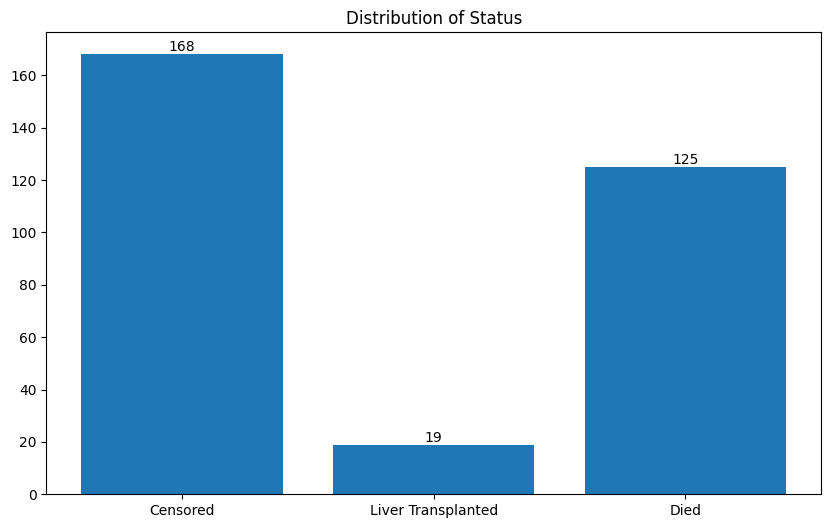

In [148]:
#Status distribution
status_counts = data['status'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(status_counts.index, status_counts.values)
map = {0: 'Censored', 1: 'Liver Transplanted', 2: 'Died'}
plt.xticks(status_counts.index, [map[i] for i in status_counts.index])
plt.title('Distribution of Status')
for i, v in enumerate(status_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [108]:
# Distribution of people who received tested drug and their outcome
test_drug_data = data[data['drug'] == 1].groupby('status').size().reset_index(name='count')
print(test_drug_data)

   status  count
0       0     83
1       1     10
2       2     65


In [149]:
# Distribution of people in control group and their outcome
placebo_data = data[data['drug'] == 2].groupby('status').size().reset_index(name='count')
print(placebo_data)

   status  count
0       0     85
1       1      9
2       2     60


In [110]:
#checking duplicates in dataset
data.duplicated ().sum()

0

<BarContainer object of 20 artists>

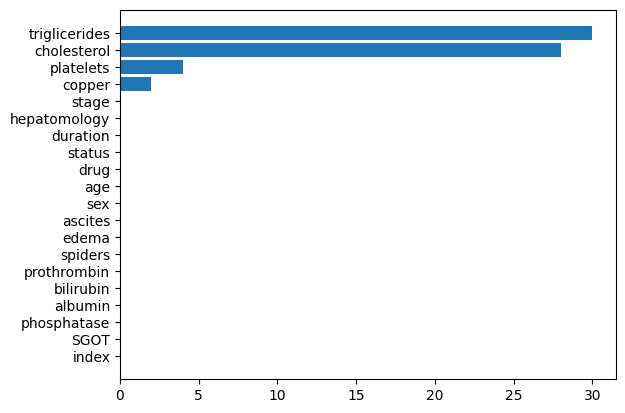

In [111]:
#hecking missing values
plt.barh(data.isnull().sum().sort_values(ascending=True).index, data.isnull().sum().sort_values(ascending=True).values)

In [ ]:
data.isnull().sum().sort_values (ascending=False)

In [ ]:
#checking data distribution of variables with missing values to determine which imputaion method (mean and median) to be used

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['triglicerides'], kde=True, bins=30, color='blue')
plt.title('Triglycerides')

plt.subplot(2, 2, 2)
sns.histplot(data['cholesterol'], kde=True, bins=30, color='green')
plt.title('Cholesterol')

plt.subplot(2, 2, 3)
sns.histplot(data['platelets'], kde=True, bins=30, color='red')
plt.title('Platelets')

plt.subplot(2, 2, 4)
sns.histplot(data['copper'], kde=True, bins=30, color='purple')
plt.title('Copper')

plt.tight_layout()
plt.show()

In [114]:
# Missing values imputation

data['triglicerides'].fillna(data['triglicerides'].median(), inplace=True)
data['cholesterol'].fillna(data['cholesterol'].median(), inplace=True)
data['platelets'].fillna(data['platelets'].mean(), inplace=True)
data['copper'].fillna(data['copper'].median(), inplace=True)

In [115]:
#recheck missing values after imputation

data.isnull().sum().sort_values (ascending=False)

,0
index,0
duration,0
prothrombin,0
platelets,0
triglicerides,0
SGOT,0
phosphatase,0
copper,0
albumin,0
cholesterol,0


In [116]:
#checking data type
data.dtypes

,0
index,int64
duration,int64
status,int64
drug,int64
age,int64
sex,int64
ascites,int64
hepatomology,int64
spiders,int64
edema,float64


In [117]:
#Summary Statistics
data.describe ()

,index,duration,status,drug,age,sex,ascites,hepatomology,spiders,edema,bilirubin,cholesterol,albumin,copper,phosphatase,SGOT,triglicerides,platelets,prothrombin,stage
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,156.500000,2006.362179,0.862179,1.493590,18269.442308,0.884615,0.076923,0.512821,0.288462,0.110577,3.256090,364.125000,3.520000,97.490385,1982.655769,122.556346,123.096154,261.935065,10.725641,3.032051
std,90.210864,1123.280843,0.960764,0.500762,3864.805407,0.319999,0.266897,0.500639,0.453775,0.274507,4.530315,221.923027,0.419892,85.360932,2140.388824,56.699525,62.122820,94.991905,1.004323,0.877880
min,1.000000,41.000000,0.000000,1.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,78.750000,1191.000000,0.000000,1.000000,15427.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,255.750000,3.310000,41.750000,871.500000,80.600000,87.000000,200.000000,10.000000,2.000000
50%,156.500000,1839.500000,0.000000,1.000000,18187.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.350000,309.500000,3.550000,73.000000,1259.000000,114.700000,108.000000,258.500000,10.600000,3.000000
75%,234.250000,2697.250000,2.000000,2.000000,20715.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.425000,392.250000,3.800000,123.000000,1980.000000,151.900000,145.250000,322.000000,11.100000,4.000000
max,312.000000,4556.000000,2.000000,2.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


In [118]:
# #droping the 'index' (identifier)
data = data.drop(columns='index', axis=1)

In [119]:
#Class balance

# Status counts
status_counts = data['status'].value_counts()
print(f"Class distribution before handling imbalance:\n{status_counts}\n")

# Separate the classes
status_0 = data[data['status'] == 0]  # Majority class
status_2 = data[data['status'] == 2]  # Second largest class
status_1 = data[data['status'] == 1]  # Minority class

# Determine the target size for oversampling (match the size of status_0)
target_size = len(status_0)

# Perform oversampling of the minority class (status_1)
status_1_oversampled = status_1.sample(n=target_size, replace=True, random_state=42)

# Combine the original majority class and the oversampled minority class
balanced_data = pd.concat([status_0, status_2, status_1_oversampled])

# Shuffle the dataset to mix the samples
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new class distribution
new_status_counts = balanced_data['status'].value_counts()
print(f"Class distribution after handling imbalance:\n{new_status_counts}\n")

Class distribution before handling imbalance:
status
0    168
2    125
1     19
Name: count, dtype: int64

Class distribution after handling imbalance:
status
0    168
1    168
2    125
Name: count, dtype: int64



In [ ]:
#Data transformation by log

selected_features = ['duration', 'age', 'bilirubin', 'cholesterol', 'albumin', 'copper',
       'phosphatase', 'SGOT', 'triglicerides', 'platelets', 'prothrombin']

# Check for the presence of negative values
for feature in selected_features:
    if balanced_data[feature].min() < 0:
        print(f"Feature {feature} contains negative values; log1p transformation may not be appropriate.")

# Apply log1p transformation to the DataFrame
data_transformed = balanced_data.copy()
for feature in selected_features:
    if balanced_data[feature].min() >= 0:  # Only to non-negative values
        data_transformed[feature] = np.log1p(balanced_data[feature])
    else:
        print(f"Skipping log1p transformation for feature {feature} due to negative values.")

# Check the result
data_transformed.head()

In [121]:
print(data_transformed['status'].value_counts())

status
0    168
1    168
2    125
Name: count, dtype: int64


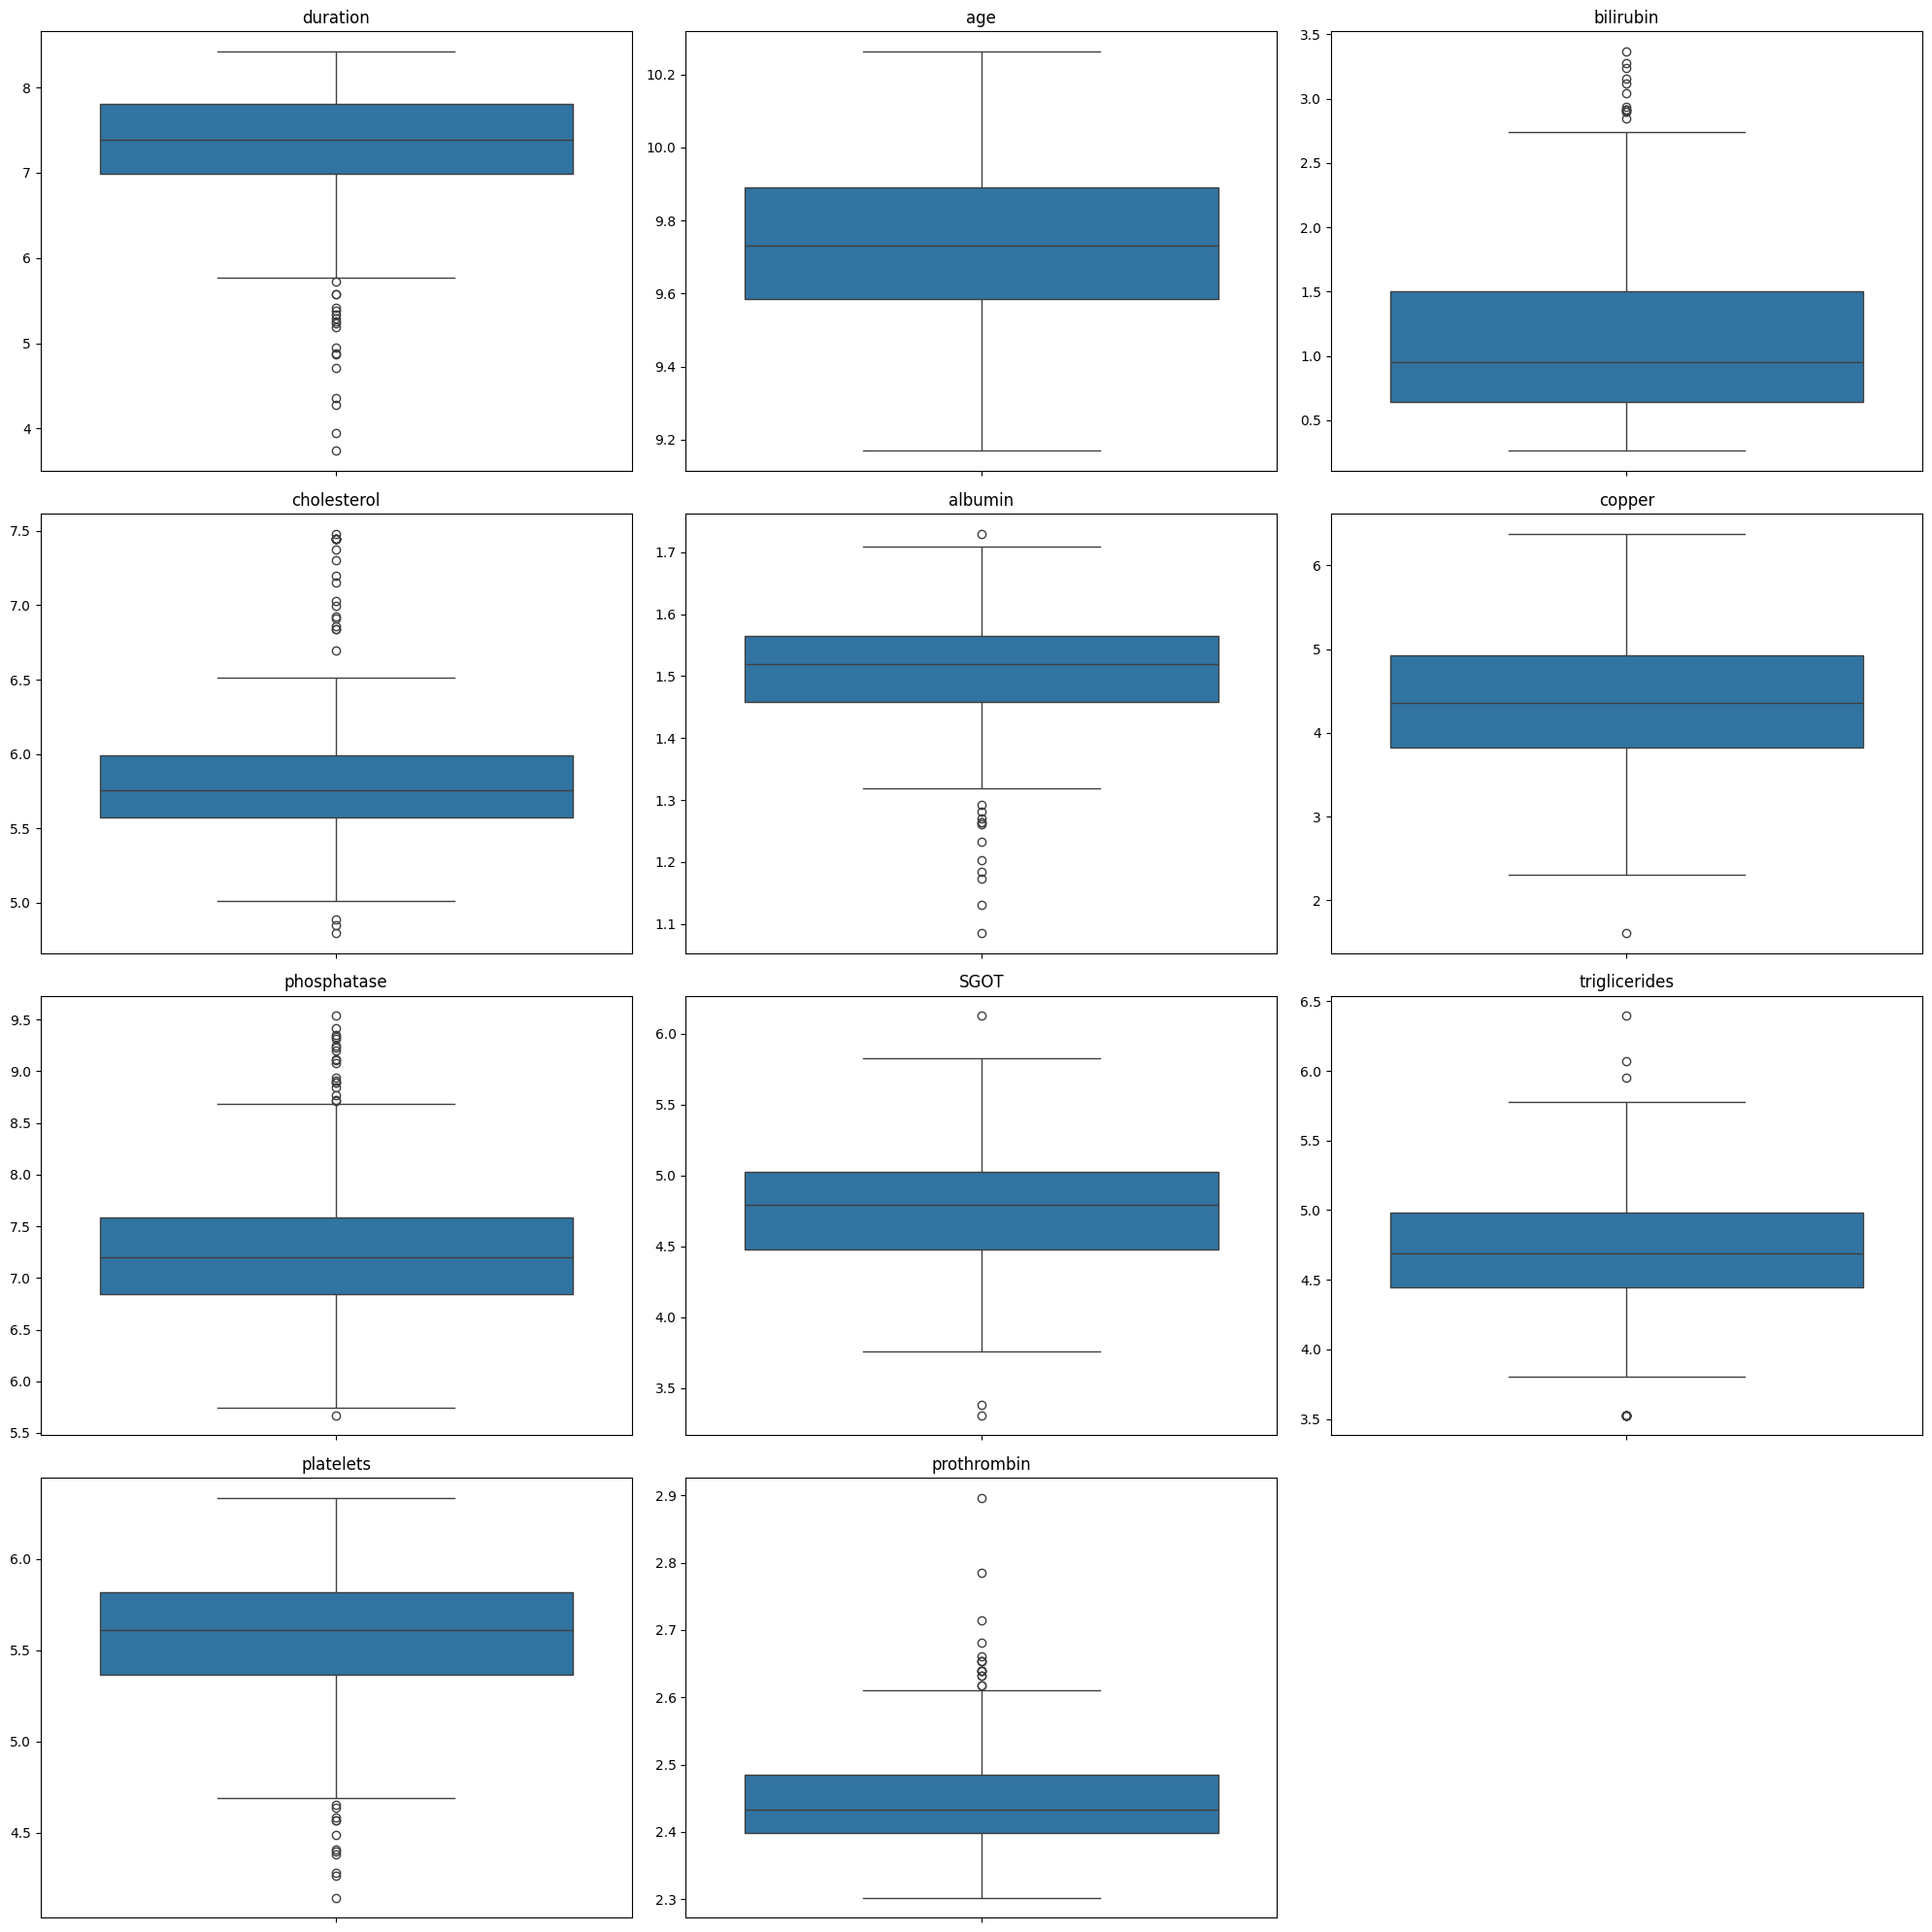

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(data_transformed, figsize=(20, 20)):
    # List of continuous columns
    numeric_columns = ['duration', 'age', 'bilirubin', 'cholesterol', 'albumin',
                       'copper', 'phosphatase', 'SGOT', 'triglicerides', 'platelets',
                       'prothrombin']

    n = len(numeric_columns)
    ncols = 3
    nrows = (n // ncols) + (n % ncols > 0)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for i, column in enumerate(numeric_columns):
        sns.boxplot(y=data_transformed[column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    for i in range(n, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()
plot_boxplots(data_transformed)

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outliers[feature] = outlier_indices

    return outliers

# Function to display outliers
def display_outliers(df, outliers):
    # Combine all outlier indices into a single set to avoid duplicates
    all_outlier_indices = set()
    for indices in outliers.values():
        all_outlier_indices.update(indices)

    # Display rows corresponding to the outliers
    outlier_rows = df.loc[list(all_outlier_indices)]
    return outlier_rows

# Define numeric columns to check for outliers
numeric_columns = ['duration', 'age', 'bilirubin', 'cholesterol', 'albumin',
                   'copper', 'phosphatase', 'SGOT', 'triglicerides', 'platelets',
                   'prothrombin']

# Detect outliers
outliers = detect_outliers_iqr(data_transformed, numeric_columns)

# Display outliers
outlier_rows = display_outliers(data_transformed, outliers)
print(f"Rows corresponding to outliers:{outlier_rows}")
print(outlier_rows)
print(f"Number of outlier rows: {outlier_rows.shape}")

In [124]:
def remove_outliers(df, outliers):
    # Combine all outlier indices into a single set to avoid duplicates
    all_outlier_indices = set()
    for indices in outliers.values():
        all_outlier_indices.update(indices)

    # Remove outliers from the DataFrame
    df_cleaned = data_transformed.drop(index=all_outlier_indices, errors='ignore')
    return df_cleaned

# Handle outliers by removing them
data_cleaned = remove_outliers(data_transformed, outliers)

# Verify the result
print("Data before removing outliers:")
print(data_transformed.shape)
print("Data after removing outliers:")
print(data_cleaned.shape)

Data before removing outliers:
(461, 19)
Data after removing outliers:
(365, 19)


In [ ]:
data_cleaned.head()

In [ ]:
def normalization(df, features):
    df_normalized = df.copy()  # Use the provided DataFrame, not `data_cleaned`
    for feature in features:
        min_value = df[feature].min()
        max_value = df[feature].max()

        # Check if min and max are the same (to avoid division by zero)
        if min_value == max_value:
            df_normalized[feature] = 0  # or 1, or any other value that makes sense for your data
        else:
            # Normalization formula
            df_normalized[feature] = (df[feature] - min_value) / (max_value - min_value)

    return df_normalized

# Define numeric columns to normalize
numeric_columns = ['duration', 'age', 'bilirubin', 'cholesterol', 'albumin',
                   'copper', 'phosphatase', 'SGOT', 'triglicerides', 'platelets',
                   'prothrombin']

# Apply normalization
df_cleaned = normalization(data_cleaned, numeric_columns)

# Display the first few rows of the normalized dataset
print("Normalized dataset:")
df_cleaned.head()


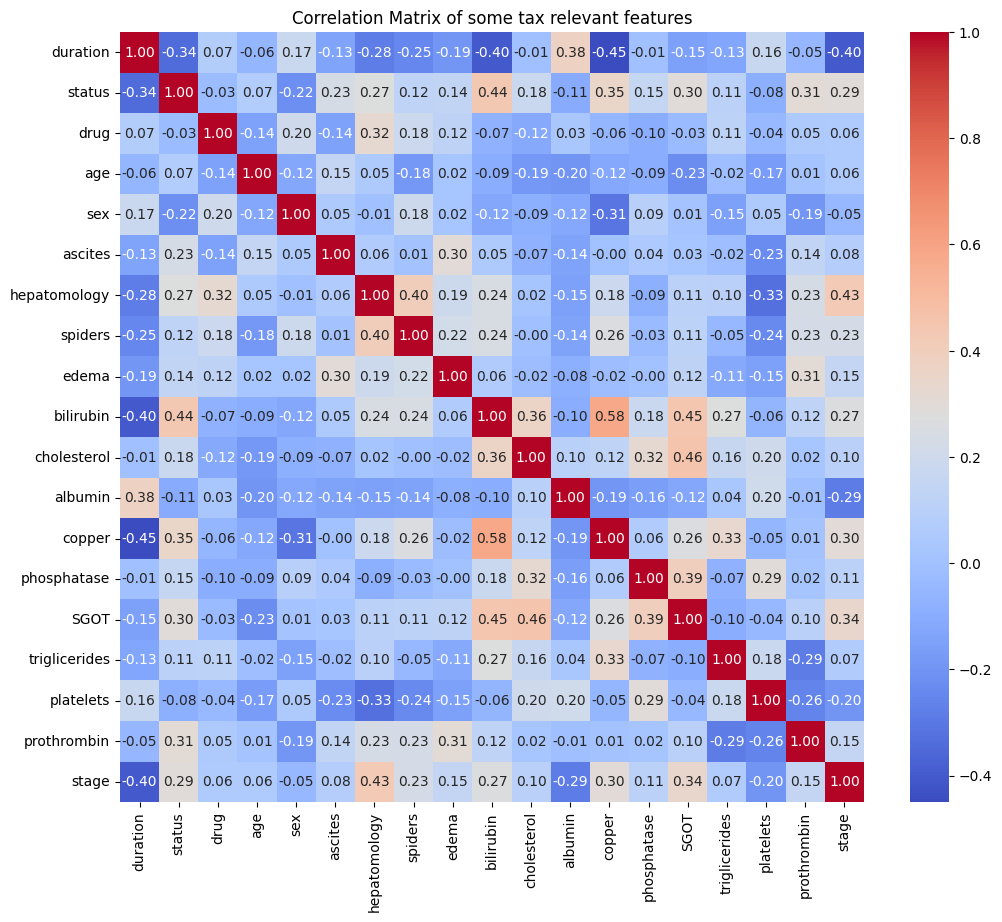

In [127]:
# Compute correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of some tax relevant features')
plt.show()

#Survival Prediction

##Multi-Class Logistic Regression

In [128]:
#Data Spliting
 #Split predictors and response
X = df_cleaned.drop('status', axis=1).values
y = df_cleaned['status'].values

# Ensure y is numeric and integer type
y = y.astype(int)

 #Split train and test
limit = int(len(df_cleaned) * 0.8)
X_train, X_test = X[:limit], X[limit:]
y_train, y_test = y[:limit], y[limit:]

In [129]:
#Important function
# Softmax function to normalize output
def softmax(H):
    return (np.exp(H.T) / np.sum(np.exp(H), axis=1)).T

# Categorical cross-entropy loss function
def cat_cross_entropy(Y, P_hat):
    return -(1/len(Y)) * np.sum(np.sum(Y * np.log(P_hat), axis=1), axis=0)

# Convert indices to one-hot encoding
def indices_to_one_hot(data, nb_classes):
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

# Accuracy function to calculate prediction accuracy
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [130]:
# Multi-Class Logistic Regression class
class MVLLogisticRegression():
    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)
        N, D = X.shape
        K = len(np.unique(y))  # Number of classes
        Y = indices_to_one_hot(y, K)  # One-hot encode labels

        # Initialize weights and biases
        self.W = np.random.randn(D, K)  # Weights
        self.b = np.random.randn(K)     # Biases
        J = np.zeros(epochs)

        # SGD Training
        for epoch in range(epochs):
            P_hat = self.__forward__(X)  # Compute predicted probabilities
            J[epoch] = cat_cross_entropy(Y, P_hat)  # Compute loss

            # Weight updates using gradient descent
            self.W -= eta * (1/N) * X.T @ (P_hat - Y)
            self.b -= eta * (1/N) * np.sum(P_hat - Y, axis=0)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Training Curve')
            plt.show()

    # Define the forward method (linear transformation + softmax)
    def __forward__(self, X):
        return softmax(X @ self.W + self.b)

    # Predict classes
    def predict(self, X):
        P_hat = self.__forward__(X)
        return np.argmax(P_hat, axis=1)  # Return class with max probability

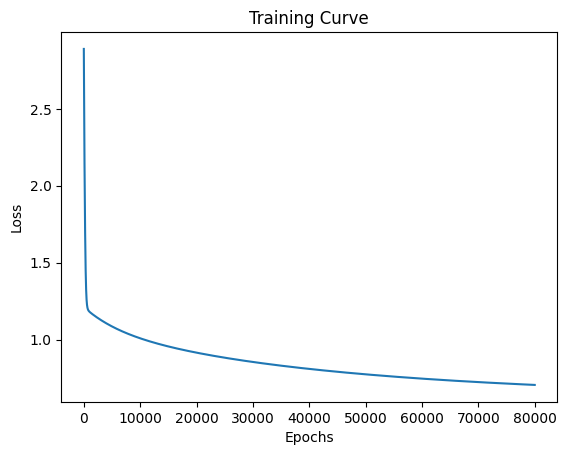

In [131]:
# Train the model
mv_logreg = MVLLogisticRegression()
mv_logreg.fit(X_train, y_train, epochs=8e4, show_curve=True)

In [132]:
# Predict on the test set
y_hat = mv_logreg.predict(X_test)

In [ ]:
# Evaluate accuracy on the test set
# np.random.seed(42)
test_accuracy = accuracy(y_test, y_hat)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
#mv_logreg.W
#mv_logreg.b

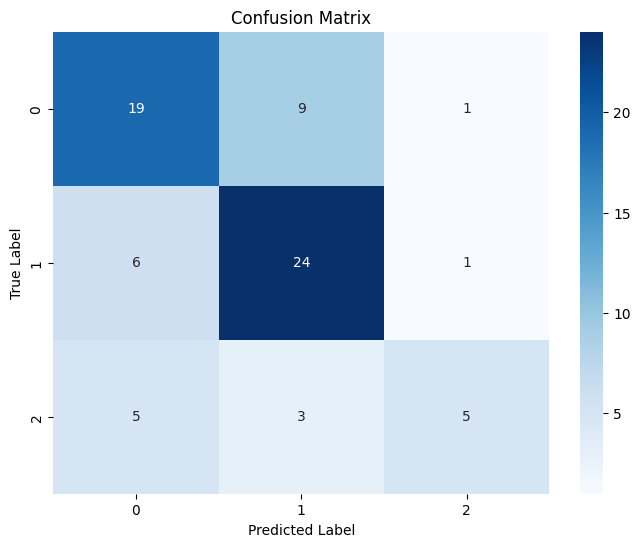

In [134]:
# Compute confusion matrix

def confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true, pred] += 1
    return matrix

# Define the function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

num_classes = len(np.unique(y))
conf_matrix = confusion_matrix(y_test, y_hat, num_classes)

# Class names
class_names = [str(i) for i in range(num_classes)]

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, class_names)

## Optimized MV Logistic regression

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Softmax function to normalize output
def softmax(H):
    H_exp = np.exp(H - np.max(H, axis=1, keepdims=True))
    return H_exp / np.sum(H_exp, axis=1, keepdims=True)

# Categorical cross-entropy loss function
def cat_cross_entropy(Y, P_hat):
    return -np.mean(np.sum(Y * np.log(np.clip(P_hat, 1e-10, 1-1e-10)), axis=1))

# Convert indices to one-hot encoding
def indices_to_one_hot(data, nb_classes):
    return np.eye(nb_classes)[data]

# Accuracy function to calculate prediction accuracy
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

# Multi-Class Logistic Regression class with Early Stopping
class MVLLogisticRegression:
    def __init__(self, learning_rate=0.01, l2_lambda=0.01):
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.best_W = None
        self.best_b = None
        self.best_val_loss = float('inf')
        self.patience_counter = 0

    def fit(self, X, y, epochs=1000, batch_size=32, validation_split=0.2, patience=20, show_curve=False):
        # Store parameters for printing
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split
        self.patience = patience

        # Split the data into training and validation sets
        split_index = int(len(X) * (1 - validation_split))
        X_train, X_val = X[:split_index], X[split_index:]
        y_train, y_val = y[:split_index], y[split_index:]

        N, D = X_train.shape
        K = len(np.unique(y))
        Y_train = indices_to_one_hot(y_train, K)
        Y_val = indices_to_one_hot(y_val, K)

        # Initialize weights and biases
        self.W = np.random.randn(D, K) / np.sqrt(D)
        self.b = np.zeros(K)

        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            # Mini-batch gradient descent
            for i in range(0, N, batch_size):
                X_batch = X_train[i:i+batch_size]
                Y_batch = Y_train[i:i+batch_size]  # Ensure Y_batch is one-hot encoded

                P_hat = self.forward(X_batch)
                grad_W = (1/batch_size) * X_batch.T @ (P_hat - Y_batch) + self.l2_lambda * self.W
                grad_b = (1/batch_size) * np.sum(P_hat - Y_batch, axis=0)

                self.W -= self.learning_rate * grad_W
                self.b -= self.learning_rate * grad_b

            # Compute training and validation loss
            train_loss = cat_cross_entropy(Y_train, self.forward(X_train))
            val_loss = cat_cross_entropy(Y_val, self.forward(X_val))  # Corrected variable name
            train_losses.append(train_loss)
            val_losses.append(val_loss)

            # Early stopping
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.patience_counter = 0
                self.best_W = self.W.copy()
                self.best_b = self.b.copy()
            else:
                self.patience_counter += 1

            if self.patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                self.W = self.best_W
                self.b = self.best_b
                break

        if show_curve:
            plt.figure(figsize=(10, 5))
            plt.plot(train_losses, label='Training Loss')
            plt.plot(val_losses, label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Training and Validation Loss Curves')
            plt.legend()
            plt.show()

    def forward(self, X):
        return softmax(X @ self.W + self.b)

    def predict(self, X):
        P_hat = self.forward(X)
        return np.argmax(P_hat, axis=1)

# Scaling
def manual_scaling(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1  # Avoid division by zero
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled, mean, std

# Apply scaling
X_train_scaled, X_test_scaled, mean, std = manual_scaling(X_train, X_test)

# Train the model
mv_logreg1 = MVLLogisticRegression(learning_rate=0.01, l2_lambda=0.01)
mv_logreg1.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_split=0.2, patience=20, show_curve=True)

# Predict on the test set
y_hat1 = mv_logreg1.predict(X_test_scaled)

# Evaluate accuracy on the entire dataset
overall_accuracy = accuracy(y_test, y_hat1)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

# Print optimized parameters and training details
print("Optimized Parameters:")
print("Weights (W):")
print(mv_logreg1.W)
print("Biases (b):")
print(mv_logreg1.b)
print("Learning Rate:", mv_logreg1.learning_rate)
print("Epochs:", mv_logreg1.epochs)
print("Batch Size:", mv_logreg1.batch_size)
print("Validation Split:", mv_logreg1.validation_split)
print("Patience:", mv_logreg1.patience)

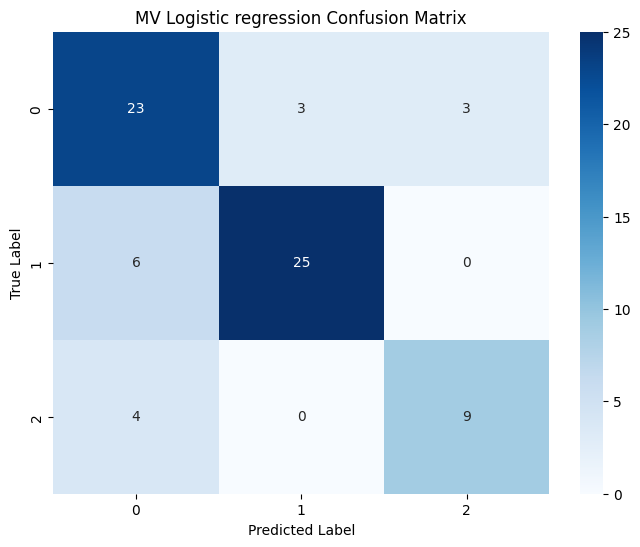

In [154]:
# Compute confusion matrix
def confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true, pred] += 1
    return matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('MV Logistic regression Confusion Matrix')
    plt.show()

# Number of classes from the true labels
num_classes = len(np.unique(y_test))

# Predict on the test set
y_hat = mv_logreg1.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat1, num_classes)
class_names = [str(i) for i in range(num_classes)]

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, class_names)

In [ ]:
# Softmax function to normalize output
def softmax(H):
    H_exp = np.exp(H - np.max(H, axis=1, keepdims=True))
    return H_exp / np.sum(H_exp, axis=1, keepdims=True)

# Categorical cross-entropy loss function
def cat_cross_entropy(Y, P_hat):
    return -np.mean(np.sum(Y * np.log(np.clip(P_hat, 1e-10, 1-1e-10)), axis=1))

# Convert indices to one-hot encoding
def indices_to_one_hot(data, nb_classes):
    return np.eye(nb_classes)[data]

# Accuracy function to calculate prediction accuracy
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

# Multi-Class Logistic Regression class with Early Stopping
class MVLLogisticRegression:
    def __init__(self, learning_rate=0.01, l2_lambda=0.01):
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.best_W = None
        self.best_b = None
        self.best_val_loss = float('inf')
        self.patience_counter = 0

    def fit(self, X, y, epochs=1000, batch_size=32, validation_split=0.2, patience=20, show_curve=False):
        # Store parameters for printing
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split
        self.patience = patience

        # Split the data into training and validation sets
        split_index = int(len(X) * (1 - validation_split))
        X_train, X_val = X[:split_index], X[split_index:]
        y_train, y_val = y[:split_index], y[split_index:]

        N, D = X_train.shape
        K = len(np.unique(y))
        Y_train = indices_to_one_hot(y_train, K)
        Y_val = indices_to_one_hot(y_val, K)

        # Initialize weights and biases
        self.W = np.random.randn(D, K) / np.sqrt(D)
        self.b = np.zeros(K)

        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            # Mini-batch gradient descent
            for i in range(0, N, batch_size):
                X_batch = X_train[i:i+batch_size]
                Y_batch = Y_train[i:i+batch_size]

                P_hat = self.forward(X_batch)
                grad_W = (1/batch_size) * X_batch.T @ (P_hat - Y_batch) + self.l2_lambda * self.W
                grad_b = (1/batch_size) * np.sum(P_hat - Y_batch, axis=0)

                self.W -= self.learning_rate * grad_W
                self.b -= self.learning_rate * grad_b

            # Compute training and validation loss
            train_loss = cat_cross_entropy(Y_train, self.forward(X_train))
            val_loss = cat_cross_entropy(Y_val, self.forward(X_val))  # Corrected variable name
            train_losses.append(train_loss)
            val_losses.append(val_loss)

            # Early stopping
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                self.patience_counter = 0
                self.best_W = self.W.copy()
                self.best_b = self.b.copy()
            else:
                self.patience_counter += 1

            if self.patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                self.W = self.best_W
                self.b = self.best_b
                break

        if show_curve:
            plt.figure(figsize=(10, 5))
            plt.plot(train_losses, label='Training Loss')
            plt.plot(val_losses, label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Training and Validation Loss Curves')
            plt.legend()
            plt.show()

    def forward(self, X):
        return softmax(X @ self.W + self.b)

    def predict(self, X):
        P_hat = self.forward(X)
        return np.argmax(P_hat, axis=1)

# Scaling
def manual_scaling(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1  # Avoid division by zero
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled, mean, std

# Function to print class probabilities
def print_class_probabilities(model, X):
    P_hat = model.forward(X)
    print("Class Probabilities for Each Sample:")
    print(P_hat)

# Function to print feature importance
def print_feature_importance(model, feature_names):
    print("Feature Importance (magnitude of weights):")
    feature_importance = np.abs(model.W)
    for i, feature_name in enumerate(feature_names):
        importance = np.mean(feature_importance[i])
        print(f"{feature_name}: Importance {importance:.4f}")

# Apply scaling
X_train_scaled, X_test_scaled, mean, std = manual_scaling(X_train, X_test)

# Train the model
mv_logreg1 = MVLLogisticRegression(learning_rate=0.01, l2_lambda=0.01)
mv_logreg1.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_split=0.2, patience=20, show_curve=True)

# Predict on the test set
y_hat1 = mv_logreg1.predict(X_test_scaled)

# Evaluate accuracy on the entire dataset
overall_accuracy = accuracy(y_test, y_hat1)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

# Print optimized parameters and training details
print("Optimized Parameters:")
print("Weights (W):")
print(mv_logreg1.W)
print("Biases (b):")
print(mv_logreg1.b)
print("Learning Rate:", mv_logreg1.learning_rate)
print("Epochs:", mv_logreg1.epochs)
print("Batch Size:", mv_logreg1.batch_size)
print("Validation Split:", mv_logreg1.validation_split)
print("Patience:", mv_logreg1.patience)

# Print class probabilities for the test set
print_class_probabilities(mv_logreg1, X_test_scaled)

# Print feature importance
feature_names = X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else [f'Feature {i}' for i in range(X_train_scaled.shape[1])]
print_feature_importance(mv_logreg1, feature_names)

##ANN

In [141]:
# Activation functions and their derivatives
def ReLU(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def linear(Z):
    return Z

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # Stability improvement
    return expZ / expZ.sum(axis=1, keepdims=True)

In [142]:
# Derivatives of Activation Functions

def derivative (Z, a):
  if a == linear:
    return 1
  elif a==sigmoid:
    return Z*(1-Z)
  elif a==np.tanh:
    return 1-Z**2
  elif a==ReLU:
    return (Z>0).astype(int)
  else:
    ValueError('Unknown activation function')

In [143]:
# One-hot encoding
def one_hot(y):
    nb_classes = len(np.unique(y))
    return np.eye(nb_classes)[y.reshape(-1)]

# Loss functions
def cross_entropy(Y, P_hat):
    return -(1/len(Y)) * np.sum(np.sum(Y * np.log(P_hat), axis=1), axis=0)

def OLS(Y, P_hat):  # Ordinary Least Squares for regression
    return np.mean((Y - P_hat)**2)

In [144]:
# ANN class
class ANN():
    def __init__(self, architecture, activations=None, mode=0):
        self.mode = mode
        self.architecture = architecture
        self.activations = activations
        self.L = len(architecture) + 1

    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
        epochs = int(epochs)

        if self.mode:
            Y = y
            K = 1
        else:
            Y = one_hot(y)
            K = Y.shape[1]

        N, D = X.shape

        # Initialize Weights and Biases
        self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D] + self.architecture, self.architecture + [K]), 1)}
        self.B = {l: np.random.randn(M) for l, M in enumerate(self.architecture + [K], 1)}

        # Activation setup
        if self.activations is None:
            self.a = {l: ReLU for l in range(1, self.L)}
        else:
            self.a = {l: act for l, act in enumerate(self.activations, 1)}

        # Output activation function
        if self.mode:
            self.a[self.L] = linear
        else:
            self.a[self.L] = softmax

        # Loss Function
        J = np.zeros(epochs)

        # Training loop
        for epoch in range(epochs):
            self.__forward__(X)  # Forward pass

            if self.mode:
                J[epoch] = OLS(Y, self.Z[self.L])
            else:
                J[epoch] = cross_entropy(Y, self.Z[self.L])  # Cross-entropy loss for classification

            # Backpropagation
            dH = (1/N) * (self.Z[self.L] - Y)
            for l in sorted(self.W.keys(), reverse=True):
                dw = self.Z[l - 1].T @ dH
                dB = dH.sum(axis=0)

                # Weight update rules
                self.W[l] -= eta * dw
                self.B[l] -= eta * dB

                if l > 1:
                    dZ = dH @ self.W[l].T
                    dH = dZ * derivative(self.Z[l - 1], self.a[l - 1])

        # Plotting loss curve
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('ANN Training Curve')
            plt.show()

    def __forward__(self, X):
        self.Z = {0: X}
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l - 1] @ self.W[l] + self.B[l])

    def predict(self, X):
        self.__forward__(X)
        if self.mode:
            return self.Z[self.L]
        else:
            return self.Z[self.L].argmax(axis=1)

In [ ]:
# 2 hidden layers with 64 and 32 neurons
architecture = [64, 32]
activations = [ReLU, np.tanh]

# Instantiate and train ANN for classification
ann = ANN(architecture, activations=activations, mode=0)
ann.fit(X_train_scaled, y_train, eta=1e-3, epochs=3000, show_curve=True)

# Predictions on test set
y_hat = ann.predict(X_test_scaled)

# Accuracy calculation
test_accuracy = np.mean(y_hat == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
# Activation functions and their derivatives
def ReLU(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def linear(Z):
    return Z

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # Stability improvement
    return expZ / expZ.sum(axis=1, keepdims=True)

# Derivatives of Activation Functions
def derivative (Z, a):
    if a == linear:
        return 1
    elif a == sigmoid:
        return Z*(1-Z)
    elif a == np.tanh:
        return 1-Z**2
    elif a == ReLU:
        return (Z>0).astype(int)
    else:
        raise ValueError('Unknown activation function')

# One-hot encoding
def one_hot(y):
    nb_classes = len(np.unique(y))
    return np.eye(nb_classes)[y.reshape(-1)]

# Loss functions
def cross_entropy(Y, P_hat):
    return -(1/len(Y)) * np.sum(np.sum(Y * np.log(P_hat + 1e-8), axis=1), axis=0)

def OLS(Y, P_hat):
    return np.mean((Y - P_hat)**2)

# Xavier weight initialization
def xavier_init(fan_in, fan_out):
    return np.random.randn(fan_in, fan_out) * np.sqrt(2 / (fan_in + fan_out))

# ANN class
class ANN():
    def __init__(self, architecture, activations=None, mode=0, dropout_prob=0.5):
        self.mode = mode
        self.architecture = architecture
        self.activations = activations
        self.L = len(architecture) + 1
        self.dropout_prob = dropout_prob

    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False, batch_size=64):
        epochs = int(epochs)
        if self.mode:
            Y = y
            K = 1
        else:
            Y = one_hot(y)  # One-hot encode labels for classification
            K = Y.shape[1]

        N, D = X.shape

        # Initialize Weights and Biases using Xavier initialization
        self.W = {l: xavier_init(M[0], M[1]) for l, M in enumerate(zip([D] + self.architecture, self.architecture + [K]), 1)}
        self.B = {l: np.zeros(M) for l, M in enumerate(self.architecture + [K], 1)}

        # Activation setup
        if self.activations is None:
            self.a = {l: ReLU for l in range(1, self.L)}
        else:
            self.a = {l: act for l, act in enumerate(self.activations, 1)}

        # Output activation function
        if self.mode:
            self.a[self.L] = linear
        else:
            self.a[self.L] = softmax

        # Loss Function
        J = np.zeros(epochs)

        # Training loop
        for epoch in range(epochs):
            idx = np.random.permutation(N)
            X_shuffled, Y_shuffled = X[idx], Y[idx]

            for i in range(0, N, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                Y_batch = Y_shuffled[i:i + batch_size]

                self.__forward__(X_batch)  # Forward pass

                if self.mode:
                    J[epoch] = OLS(Y_batch, self.Z[self.L])
                else:
                    J[epoch] = cross_entropy(Y_batch, self.Z[self.L])  # Cross-entropy loss for classification

                # Backpropagation
                dH = (1 / batch_size) * (self.Z[self.L] - Y_batch)
                for l in sorted(self.W.keys(), reverse=True):
                    dw = self.Z[l - 1].T @ dH  # Gradient of weights
                    dB = dH.sum(axis=0)  # Gradient of biases

                    # Weight update rules with momentum
                    self.W[l] -= eta * dw
                    self.B[l] -= eta * dB

                    if l > 1:
                        dZ = dH @ self.W[l].T
                        dH = dZ * derivative(self.Z[l - 1], self.a[l - 1])  # Chain rule for backpropagation

            # Decay learning rate
            if epoch % 100 == 0 and epoch > 0:
                eta *= 0.95  # Learning rate decay

        # Plotting loss curve
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Training Curve')
            plt.show()

    def __forward__(self, X):
        self.Z = {0: X}  # Input layer
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l - 1] @ self.W[l] + self.B[l])  # Compute activations for each layer

    def predict(self, X):
        self.__forward__(X)
        if self.mode:
            return self.Z[self.L]
        else:
            return self.Z[self.L].argmax(axis=1)

# 2 hidden layers with 64 and 32 neurons
architecture = [64, 32]
activations = [ReLU, np.tanh]  # Activation functions for each layer

# Instantiate and train ANN for classification
ann1 = ANN(architecture, activations=activations, mode=0)
ann1.fit(X_train_scaled, y_train, eta=1e-3, epochs=3000, show_curve=True, batch_size=64)

# Predictions on test set
y_hat = ann1.predict(X_test_scaled)

# Accuracy calculation
test_accuracy = np.mean(y_hat == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

ANN Confusion Matrix:
[[24  2  3]
 [ 3 28  0]
 [ 5  0  8]]


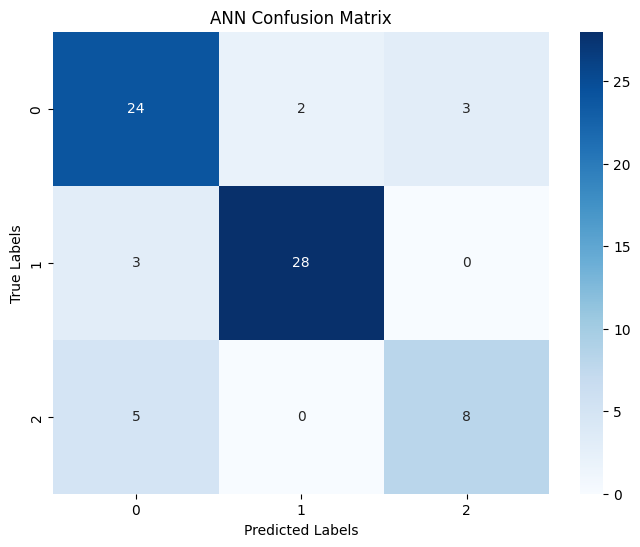

In [147]:
# Function to compute confusion matrix
def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)  # Identify unique classes
    num_classes = len(classes)

    # Create a zero matrix to hold the confusion matrix values
    cm = np.zeros((num_classes, num_classes), dtype=int)

    # Populate the confusion matrix
    for i in range(len(y_true)):
        true_label = np.where(classes == y_true[i])[0][0]
        predicted_label = np.where(classes == y_pred[i])[0][0]
        cm[true_label, predicted_label] += 1

    return cm, classes

# Predict values
y_hat = ann1.predict(X_test_scaled)

# Calculate confusion matrix
cm, classes = confusion_matrix(y_test, y_hat)

# Display confusion matrix
print("ANN Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("ANN Confusion Matrix")
plt.show()